In [167]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Dataset

In [168]:
# Import Dataset

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*  #### No null values found, and the data types look fine.

In [170]:
df.shape

(730, 16)

In [171]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis

In [172]:
# Once again checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data Cleanup

#### Based on Data dictionary, we can drop few columns which are irrelevant
##### instant (record index); dteday (date; we already have month and year in separate columns), casual and registered (cnt is the sum of both),  temp (temperature) or atemp (felt temperature) - Lets drop temp, as for bikers felt temperature is more important

In [173]:
# dropping irrelevant columns

df=df.drop("instant",axis=1)
df=df.drop("dteday",axis=1)
df=df.drop("casual",axis=1)
df=df.drop("registered",axis=1)
df=df.drop("temp",axis=1)

In [174]:
df.shape

(730, 11)

In [175]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Changing Categorical Variables for Analysis

In [176]:
# Changing Categorical variables as given in Data dictionary

df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)

df['yr'].replace({0:'2018', 1:'2019'}, inplace=True)
df['mnth'].replace({1:"Jan",2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} ,inplace=True)

df['holiday'].replace({0:'Not holiday', 1:'holiday'}, inplace=True)
df['weekday'].replace({0:'Sun',1:'Mon',2:'Tue', 3:'Wed', 4:'Thu', 5:"Fri", 6:'Sat'}, inplace=True)
df['workingday'].replace({0:'Not working day', 1:'workingday'}, inplace=True)

df['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Snow', 4:'Heavy Rain'}, inplace=True)

In [177]:
# checking if the changes are reflecting
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Not holiday,Mon,workingday,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Not holiday,Tue,workingday,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Not holiday,Wed,workingday,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Not holiday,Thu,workingday,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Not holiday,Fri,workingday,Clear,11.46350,43.6957,12.522300,1600


### Data Visualization

#### Visualizing Categorical variables with the Target Variable "cnt"

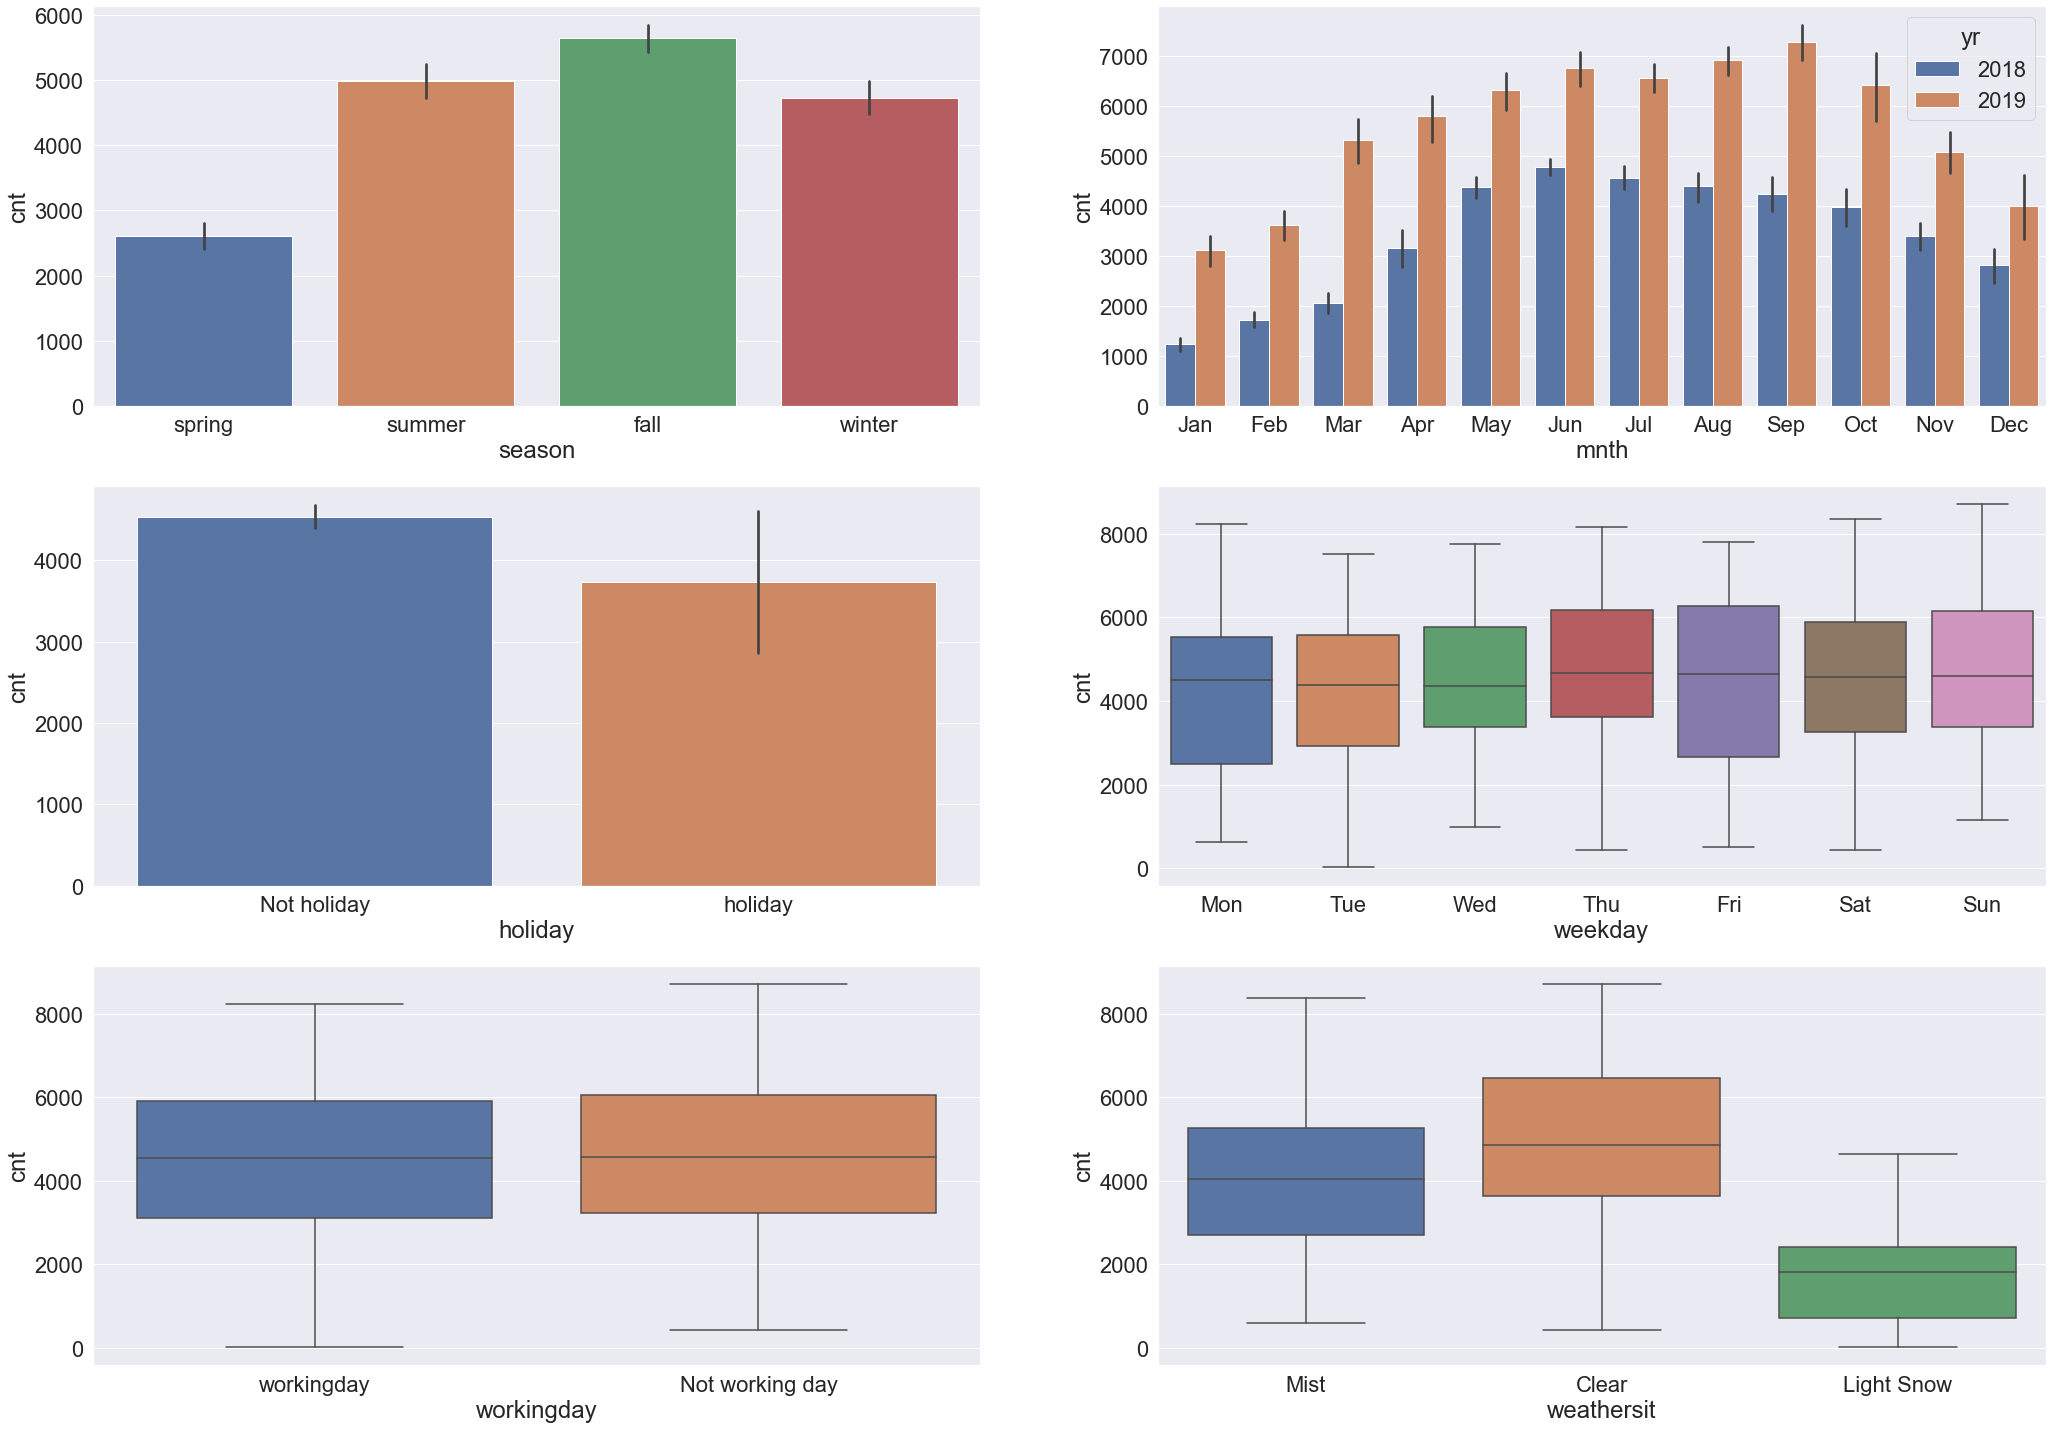

In [178]:
plt.figure(figsize=(35,25))

sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.barplot(x='season',y='cnt',data=df)           # Season

plt.subplot(3,2,2)
sns.barplot(x='mnth',y='cnt',data=df,hue='yr')    # Month and Year together

plt.subplot(3,2,3)
sns.barplot(x='holiday', y='cnt', data = df)      # Holiday

plt.subplot(3,2,4)
sns.boxplot(x='weekday', y='cnt', data = df)      # Weekday

plt.subplot(3,2,5)
sns.boxplot(x='workingday', y='cnt', data = df)   # Working Day

plt.subplot(3,2,6)
sns.boxplot(x='weathersit', y='cnt', data = df)   # Weather

plt.show()

*  _Season_: Highest demand in "Fall" and lowest in "Spring". This shows, the demand increases after "Spring", keeps increasing in "Summer", reaches peak in "Fall" and then starts decreasing "Winter" onwards

*  _Month and Year_: Highest demand can be observed in the month of September. Also, 2019 has higher demand. 

*  _Holiday_: On holiday, the demand decreases

*  _Weekday_: Demand is almost same every day.

*  _Working day_: Demand is same, be it working or non working day

*  _Weather_: Higher demand on Clear weather days and minimum on Light Snow weather days.

#### Visualizing Numeric variables with the Target Variable "cnt" (part of Subjective Questions)

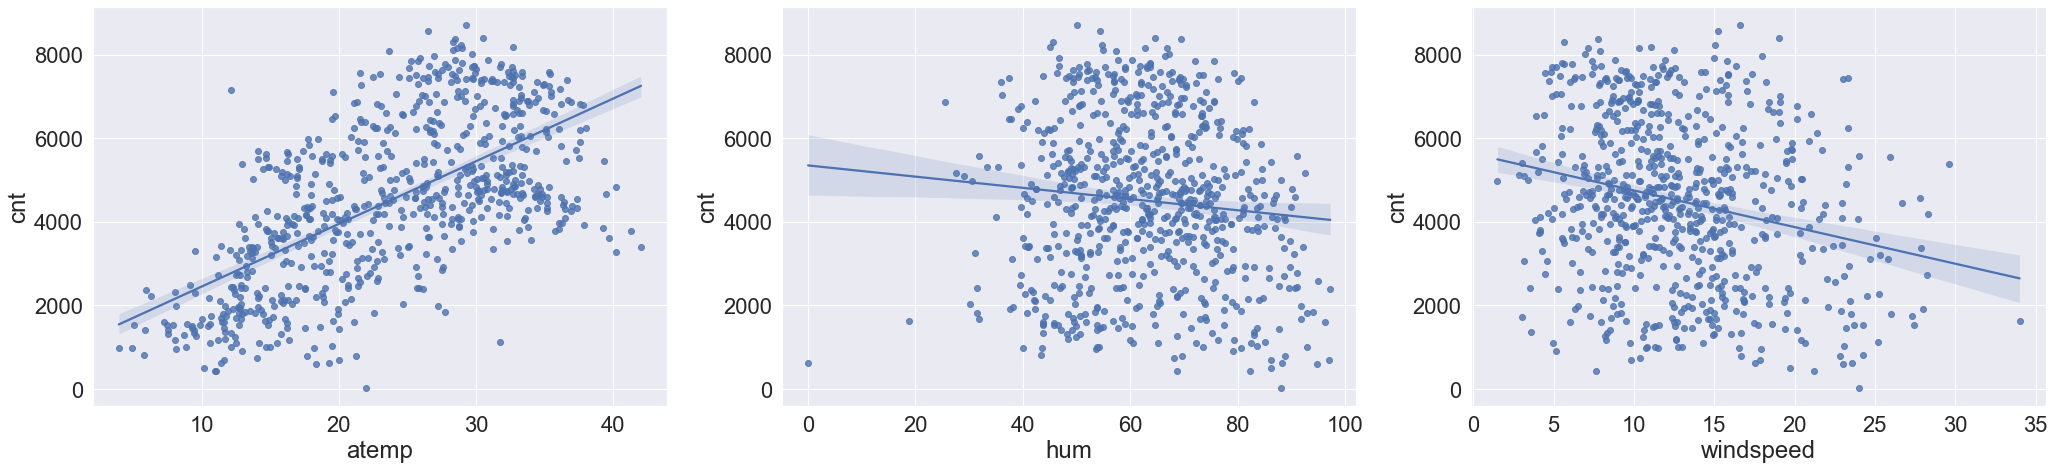

In [179]:
plt.figure(figsize=(35,25))
sns.set(font_scale = 2)
plt.subplot(3,3,1)
sns.regplot(x='atemp', y='cnt', data=df)
plt.subplot(3,3,2)
sns.regplot(x='hum', y='cnt', data=df)
plt.subplot(3,3,3)
sns.regplot(x='windspeed', y='cnt', data=df)
plt.show()

#### Visualizing Numerical variables with the Target Variable "cnt" using CORRELATION

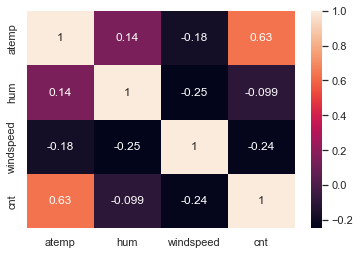

In [180]:
sns.set(font_scale=1)
sns.heatmap(df[['atemp','hum','windspeed','cnt']].corr(), annot=True)
plt.show()

*  Highest positive correlation can be seen between "atemp" and "cnt"

# Data Preparation
### Creating dummy columns for Categorical variables

In [181]:
df_dummy = pd.get_dummies(df[['season', 'yr','mnth','holiday','workingday','weekday', 'weathersit']], drop_first = True)
df_dummy.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Merge the dummy columns created with the original data set

In [182]:
df = pd.concat([df,df_dummy], axis=1)    # Concatenation
df.info()                                # Checking if concatenation reflected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 730 non-null    object 
 1   yr                     730 non-null    object 
 2   mnth                   730 non-null    object 
 3   holiday                730 non-null    object 
 4   weekday                730 non-null    object 
 5   workingday             730 non-null    object 
 6   weathersit             730 non-null    object 
 7   atemp                  730 non-null    float64
 8   hum                    730 non-null    float64
 9   windspeed              730 non-null    float64
 10  cnt                    730 non-null    int64  
 11  season_spring          730 non-null    uint8  
 12  season_summer          730 non-null    uint8  
 13  season_winter          730 non-null    uint8  
 14  yr_2019                730 non-null    uint8  
 15  mnth_A

### Drop the unwanted columns for which dummy columns have been created

In [183]:
df = df.drop(['yr','season','mnth','weathersit','holiday','workingday','weekday'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atemp                  730 non-null    float64
 1   hum                    730 non-null    float64
 2   windspeed              730 non-null    float64
 3   cnt                    730 non-null    int64  
 4   season_spring          730 non-null    uint8  
 5   season_summer          730 non-null    uint8  
 6   season_winter          730 non-null    uint8  
 7   yr_2019                730 non-null    uint8  
 8   mnth_Aug               730 non-null    uint8  
 9   mnth_Dec               730 non-null    uint8  
 10  mnth_Feb               730 non-null    uint8  
 11  mnth_Jan               730 non-null    uint8  
 12  mnth_Jul               730 non-null    uint8  
 13  mnth_Jun               730 non-null    uint8  
 14  mnth_Mar               730 non-null    uint8  
 15  mnth_M

### Train / Test data split

In [184]:
# Splitting the data in train and test data sets (70-30 split)

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [185]:
df_train.shape

(510, 29)

In [186]:
df_test.shape

(220, 29)

### Rescaling

In [187]:
# MinMax Scaling (Normalized)
rescaled = MinMaxScaler()

# Rescaling to all columns except dummy
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = rescaled.fit_transform(df_train[num_vars])
df_train.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
426,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Dividing into X and Y sets

In [188]:
y_train = df_train.pop('cnt')
X_train = df_train

In [189]:
X_train.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### RFE (Recursive Feature Elimination)

In [190]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE with output number of variable equal to 15
np.random.seed(0)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [191]:
# Checking parameters selected in list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_holiday', True, 1),
 ('workingday_workingday', False, 2),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [192]:
col_train = X_train.columns[rfe.support_]     # columns to be choosen for training data
col_train

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'holiday_holiday', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [193]:
X_train.columns[~rfe.support_]      # columns to be excluded from training data

Index(['season_spring', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'workingday_workingday', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building Model using StatsModel

In [194]:
# Creating training data
X_train_rfe = X_train[col_train]

# Adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

# Creating model using statsmodel
lm = sm.OLS(y_train, X_train_sm)         # creating an instant
lm_model = lm.fit()                      # training the model
lm_model.summary()                       # get the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          2.92e-186
Time:                        14:02:16   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2931      0.032      9.260      0.000       0.231       0.355
atemp                     0.4782      0.032     14.978      0.000       0.415       0.541
hum                      -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed                -0.1771      0.026     -6.783      0.000      -0.228      -0.126
season_summer             0.0793      0.013      6.295      0.000       0.055       0.104
season_winter             0.1342      0.014      9.373      0.000       0.106       0.162
yr_2019                   0.2312      0.008     28.305      0.000       0.215       0.247
mnth_Aug                  0.0606      0.016      3.695      0.000       0.028       0.093
mnth_Dec                 -0.0486      0.019     -2.622      0.009      -0.085      -0.012
mnth_Feb                 -0.0497      0.021     -2.348      0.019      -0.091      -0.008
mnth_Jan                 -0.0762      0.021     -3.577      0.000      -0.118      -0.034
mnth_Nov                 -0.0417      0.019     -2.186      0.029      -0.079      -0.004
mnth_Sep                  0.1121      0.017      6.709      0.000       0.079       0.145
holiday_holiday          -0.0837      0.026     -3.226      0.001      -0.135      -0.033
weathersit_Light Snow    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
weathersit_Mist          -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  #### p-values of all variables are < 0.05, hence all are significant
### VIF calculation (to check if multicollinearity exists between any variables)

In [195]:
# Variance Inflation Factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,atemp,14.42
1,hum,25.06
2,windspeed,3.90
3,season_summer,2.29
4,season_winter,3.04
5,yr_2019,2.06
6,mnth_Aug,1.60
7,mnth_Dec,1.64
8,mnth_Feb,1.55
9,mnth_Jan,1.92


*  VIF of "atemp" and "hum" is very high
*  "atemp" has high correlation with Target variable 'cnt', hence we will drop "hum" only

In [196]:
#dropping 'hum' from dataset

X_train_rfe.drop(['hum'], axis=1, inplace=True)
X_train_rfe.head()

,atemp,windspeed,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,mnth_Sep,holiday_holiday,weathersit_Light Snow,weathersit_Mist
576,0.766351,0.264686,0,0,1,0,0,0,0,0,0,0,0,0
426,0.438975,0.255342,0,0,1,0,0,0,0,0,0,0,0,1
728,0.200348,0.663106,0,0,1,0,1,0,0,0,0,0,0,0
482,0.391735,0.188475,1,0,1,0,0,0,0,0,0,0,0,1
111,0.318819,0.380981,1,0,0,0,0,0,0,0,0,0,0,1


### Recreating the model after dropping the column

In [197]:
# Adding constant to variable

X_train_sm = sm.add_constant(X_train_rfe)

# Creating model using statsmodel
lm = sm.OLS(y_train, X_train_sm)      # creating an instant
lm_model = lm.fit()                   # training the model
lm_model.summary()                    # get the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          2.01e-183
Time:                        14:02:16   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2097      0.026      8.204      0.000       0.160       0.260
atemp                     0.4446      0.032     14.106      0.000       0.383       0.507
windspeed                -0.1491      0.026     -5.791      0.000      -0.200      -0.098
season_summer             0.0738      0.013      5.785      0.000       0.049       0.099
season_winter             0.1226      0.014      8.564      0.000       0.094       0.151
yr_2019                   0.2351      0.008     28.454      0.000       0.219       0.251
mnth_Aug                  0.0580      0.017      3.474      0.001       0.025       0.091
mnth_Dec                 -0.0567      0.019     -3.021      0.003      -0.094      -0.020
mnth_Feb                 -0.0558      0.021     -2.601      0.010      -0.098      -0.014
mnth_Jan                 -0.0868      0.022     -4.034      0.000      -0.129      -0.045
mnth_Nov                 -0.0418      0.019     -2.153      0.032      -0.080      -0.004
mnth_Sep                  0.1048      0.017      6.194      0.000       0.072       0.138
holiday_holiday          -0.0850      0.026     -3.220      0.001      -0.137      -0.033
weathersit_Light Snow    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
weathersit_Mist          -0.0814      0.009     -9.218      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Rechecking VIF

In [198]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,atemp,4.99
1,windspeed,3.83
2,season_summer,2.06
3,season_winter,2.63
4,yr_2019,2.06
5,mnth_Aug,1.59
6,mnth_Dec,1.41
7,mnth_Feb,1.26
8,mnth_Jan,1.29
9,mnth_Nov,1.82


*  _Now, p-values are <0.05 and VIF is <5 for all variables_, hence we will accept this model
*  Though VIF of 'atemp' is close to 5, but we cannot drop it due to its High correlation with Target variable

## Residual Analysis

In [199]:
# Predicting on training data

y_train_pred = lm_model.predict(X_train_sm)

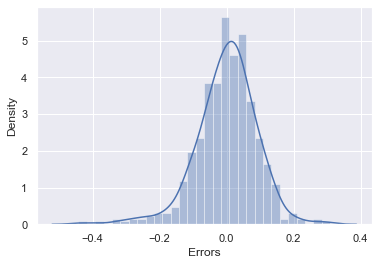

In [200]:
# Plotting histogram for residual errors

res = y_train - y_train_pred
std_dev = res.std()
sns.distplot(res)
plt.xlabel('Errors', fontsize = 12) 
plt.show()

*  Residual errors show a Normal distribution curve.

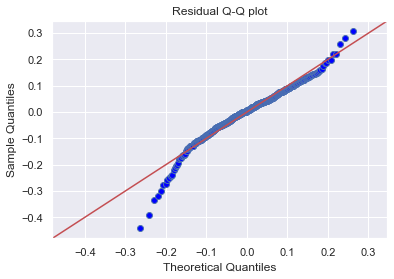

In [201]:
# plotting the Q-Q plot of residual against normal distribution (part of Subjective Questions)

fig = sm.qqplot(res, line='45', loc=0, scale=std_dev)
plt.title('Residual Q-Q plot')
plt.savefig('Residual_Q-Q plot')
plt.show()

## Prediction and Evaluation on test set

In [202]:
# Rescaling the test set

num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Scaling the data
df_test[num_vars] = rescaled.transform(df_test[num_vars])

df_test.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
535,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
299,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
221,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
152,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [203]:
# Creating predictor and target variable from test set
y_test = df_test['cnt']
X_test = df_test[X_train_rfe.columns]

# Adding constant to dataset
X_test_sm = sm.add_constant(X_test)

# Predicting on test set
y_test_pred = lm_model.predict(X_test_sm)

### Model Evaluation

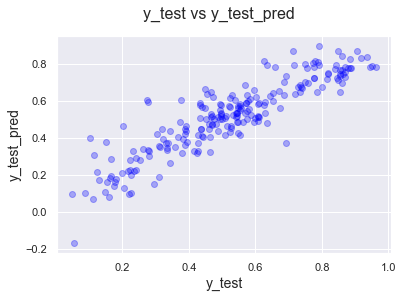

In [204]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_test_pred,color='blue',alpha=0.30)
fig.suptitle('y_test vs y_test_pred', fontsize=16)      # Plot heading 
plt.xlabel('y_test', fontsize=14)                       # X-label
plt.ylabel('y_test_pred', fontsize=14)                  # Y-label
plt.show()

*  #### The predicted values and actual/test values have a linear relationship.

### Calculating R-squared score on predicted data

In [205]:
r2_score_test = r2_score(y_test, y_test_pred)
round(r2_score_test,3)

0.807

*  ### _R-squared for train set : 0.835 ( 83.5 %)_
*  ### _R-squared for test set : 0.807 ( 80.7%)_
### Hence, this model looks good

In [206]:
# Model parameters
lm_model.params

const                    0.209739
atemp                    0.444625
windspeed               -0.149067
season_summer            0.073814
season_winter            0.122559
yr_2019                  0.235087
mnth_Aug                 0.057967
mnth_Dec                -0.056684
mnth_Feb                -0.055846
mnth_Jan                -0.086838
mnth_Nov                -0.041808
mnth_Sep                 0.104766
holiday_holiday         -0.085034
weathersit_Light Snow   -0.286308
weathersit_Mist         -0.081436
dtype: float64

### Final Model Equation

_cnt = 0.209 + atemp(0.444) + windspeed(-0.149) +season_summer(0.073) + season_winter(0.122) + yr_2019(0.235) + mnth_Aug(0.057) + mnth_Dec(-0.056) + mnth_Feb(-0.055) + mnth_Jan(-0.086) + mnth_Nov(-0.041) + mnth_Sep(0.104) + holiday_holiday(-0.085) + weathersit_Light Snow(-0.286) + weathersit_Mist(-0.081)_